# Visualizations about the dataset
This dataset covers  **`190 countries`** around the world (~about **`1100 cities`**) with over than **`73000 hotels`**. Each hotel includes around **`400 features`**.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv('/Users/osamaalhalabi/Desktop/trips-planning-system/dataset/Hotel_Features_dataset.csv')

## Visualizing the distribution of hotels over countries

In [66]:
most_common_countries = df['country'].value_counts().reset_index().head(20)
most_common_countries.columns = ['country','hotels count']

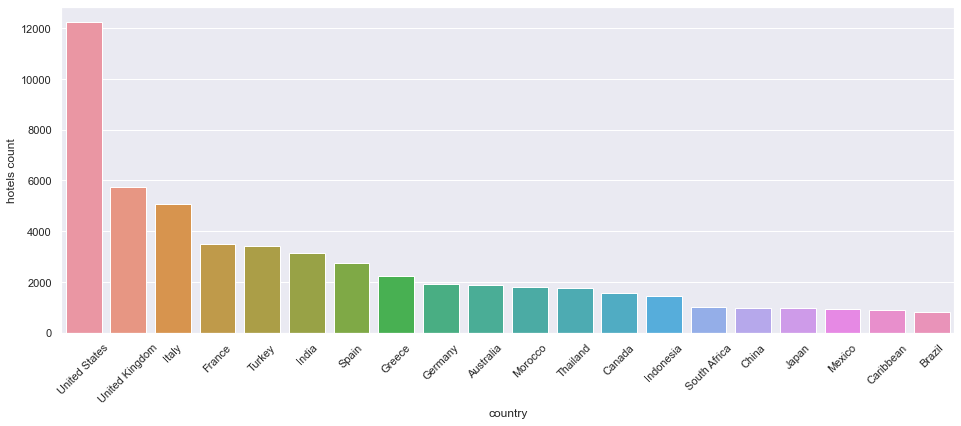

In [67]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=most_common_countries)
plt.xticks(rotation=45)
plt.show()

## Visualizing the distribution of hotels over arabic countries

In [68]:
arabic_countries = [
    'Lebanon',
    'Iraq',
    'Jordan',
    'Egypt',
    'United Arab Emirates',
    'Morocco',
    'Tunisia',
    'Saudi Arabia',
    'Oman',
    'Bahrain',
    'Algeria',
    'Qatar',
    'Kuwait',
    'Libya',
    'South Sudan',
    'Sudan',
]

In [56]:
df_ = pd.DataFrame(df[df['country'] == 'Syria'])
for country in arabic_countries:
    df_ = df_.append(df[df['country'] == country])

In [69]:
arabic_most_common_countries = df_['country'].value_counts().reset_index().head(12)
arabic_most_common_countries.columns = ['country','hotels count']

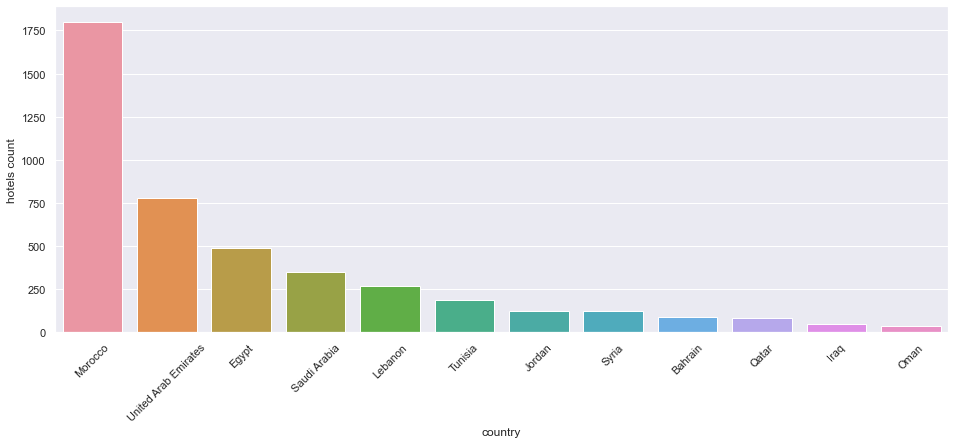

In [70]:
fig_dims = (16, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'country' , y = 'hotels count', ax=ax, data=arabic_most_common_countries)
plt.xticks(rotation=45)
plt.show()